In [6]:
import agama
import arepo
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import matplotlib as mpl

from scipy.ndimage import gaussian_filter
from scipy.stats import binned_statistic

from numba import njit

agama.setUnits(mass=1E10, length=1, velocity=1)


'Length unit: 1 Kpc, velocity unit: 1 km/s, time unit: 977.793 Myr, mass unit: 1e+10 Msun, gravitational constant: 43009.2'

In [2]:
sim_list = ['Nbody', 'phantom-vacuum-Sg20-Rc3.5']

basepath = '/n/holystore01/LABS/hernquist_lab/Users/abeane/starbar_runs/runs/'

def read_snap(idx, sim_idx, lvl='lvl3', parttype=[0], fields=['Coordinates', 'Masses', 'Velocities', 'ParticleIDs', 'Potential'],
              basepath = basepath):
    fname = basepath + sim_list[sim_idx] + '/' + lvl + '/output'
    return arepo.Snapshot(fname, idx, parttype=parttype, fields=fields, combineFiles=True)

def read_sfr(sim_idx, lvl='lvl3', basepath = basepath):
    fname = basepath + sim_list[sim_idx] + '/' + lvl + '/output/sfr.txt'
    return np.genfromtxt(fname)

def read_fourier(sim_idx, lvl='lvl3', basepath='/n/home01/abeane/starbar/plots/'):
    sim = sim_list[sim_idx]
    f = h5.File(basepath+'/fourier_component/data/fourier_'+sim+'-'+lvl+'.hdf5', mode='r')
    return f

In [26]:
sn = read_snap(500, 0, lvl='lvl4', parttype=None, fields=None)

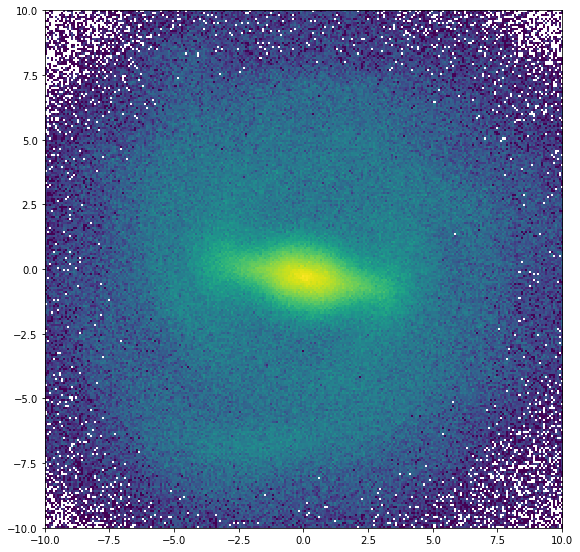

In [27]:
pos = sn.part2.pos.value

nres = 256

range_xy = [[-10, 10], [-10, 10]]

x = pos[:,0]
y = pos[:,1]
heatmap_xy, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy)

extent = [range_xy[0][0], range_xy[0][1], range_xy[1][0], range_xy[1][1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.imshow(heatmap_xy.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax.set_aspect('equal')
fig.tight_layout()

plt.show()


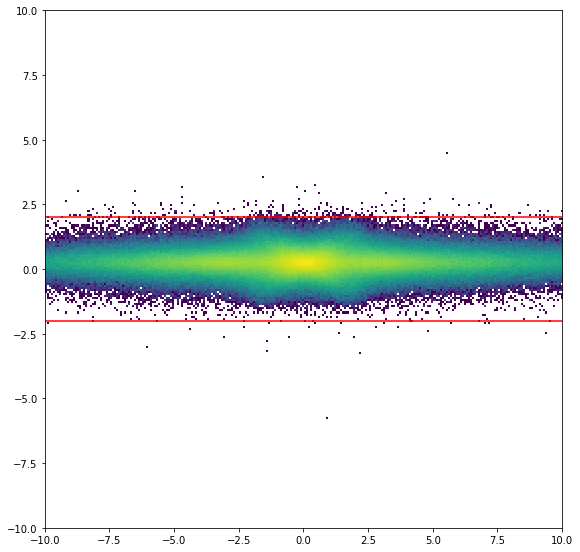

In [28]:
pos = sn.part2.pos.value

nres = 256

range_xy = [[-10, 10], [-10, 10]]

x = pos[:,0]
y = pos[:,2]
heatmap_xy, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy)

extent = [range_xy[0][0], range_xy[0][1], range_xy[1][0], range_xy[1][1]]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.axhline(-2, c='r')
ax.axhline(2, c='r')

ax.imshow(heatmap_xy.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax.set_aspect('equal')
fig.tight_layout()

plt.show()


In [29]:
def compute_vlos_curve(sn, z, deltaz=0.1, xbins = np.linspace(-10, 10, 50)):
    pos = sn.part2.pos.value
    vel = sn.part2.vel.value
    key = np.abs(pos[:,2] - z) < deltaz/2.0
    
    vlos, _, _ = binned_statistic(pos[:,0][key], vel[:,1][key], statistic='mean', bins=xbins)
    xlos, _, _ = binned_statistic(pos[:,0][key], pos[:,0][key], statistic='mean', bins=xbins)
    
    return xlos, vlos

In [30]:
x, v = compute_vlos_curve(sn, 0)

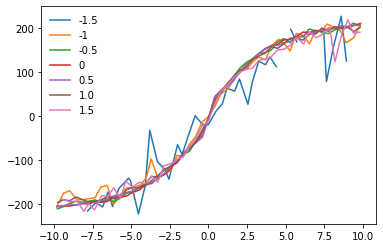

In [31]:
for z in [-1.5, -1, -0.5, 0, 0.5, 1.0, 1.5]:
    x, v = compute_vlos_curve(sn, z)
    plt.plot(x, v, label=z)
    
plt.legend(frameon=False)
plt.show()

In [33]:
7500 * 8

60000